In [34]:
import numpy as np
import random
import torch

from model import T5EncoderModel, FluxTransformer2DModel
from diffusers import FluxPipeline
hg_token = ''

In [35]:
text_encoder_2: T5EncoderModel = T5EncoderModel.from_pretrained(
    "HighCWu/FLUX.1-dev-4bit",
    subfolder="text_encoder_2",
    torch_dtype=torch.bfloat16,
)

transformer: FluxTransformer2DModel = FluxTransformer2DModel.from_pretrained(
    "HighCWu/FLUX.1-dev-4bit",
    subfolder="transformer",
    torch_dtype=torch.bfloat16,
)

pipe: FluxPipeline = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    text_encoder_2=text_encoder_2,
    transformer=transformer,
    torch_dtype=torch.bfloat16,
    token=hg_token,
)


Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [36]:
pipe.enable_model_cpu_offload() # with cpu offload, it cost 8.5GB vram
# Enable memory optimizations
pipe.enable_attention_slicing()

In [46]:
MAX_SEED = np.iinfo(np.int32).max

def gen_flux_image(prompt, height=1024, width=1024, guidance_scale=3.5, num_inference_steps=32, max_sequence_length=512, seed=-1):
    if seed == -1:
        seed = random.randint(0, MAX_SEED)
    image = pipe(
        prompt,
        height=height,
        width=width,
        guidance_scale=guidance_scale,
        output_type="pil",
        num_inference_steps=num_inference_steps,
        max_sequence_length=max_sequence_length,
        generator=torch.Generator("cpu").manual_seed(seed)
    ).images[0]
    return image

1601577501


  0%|          | 0/25 [00:00<?, ?it/s]

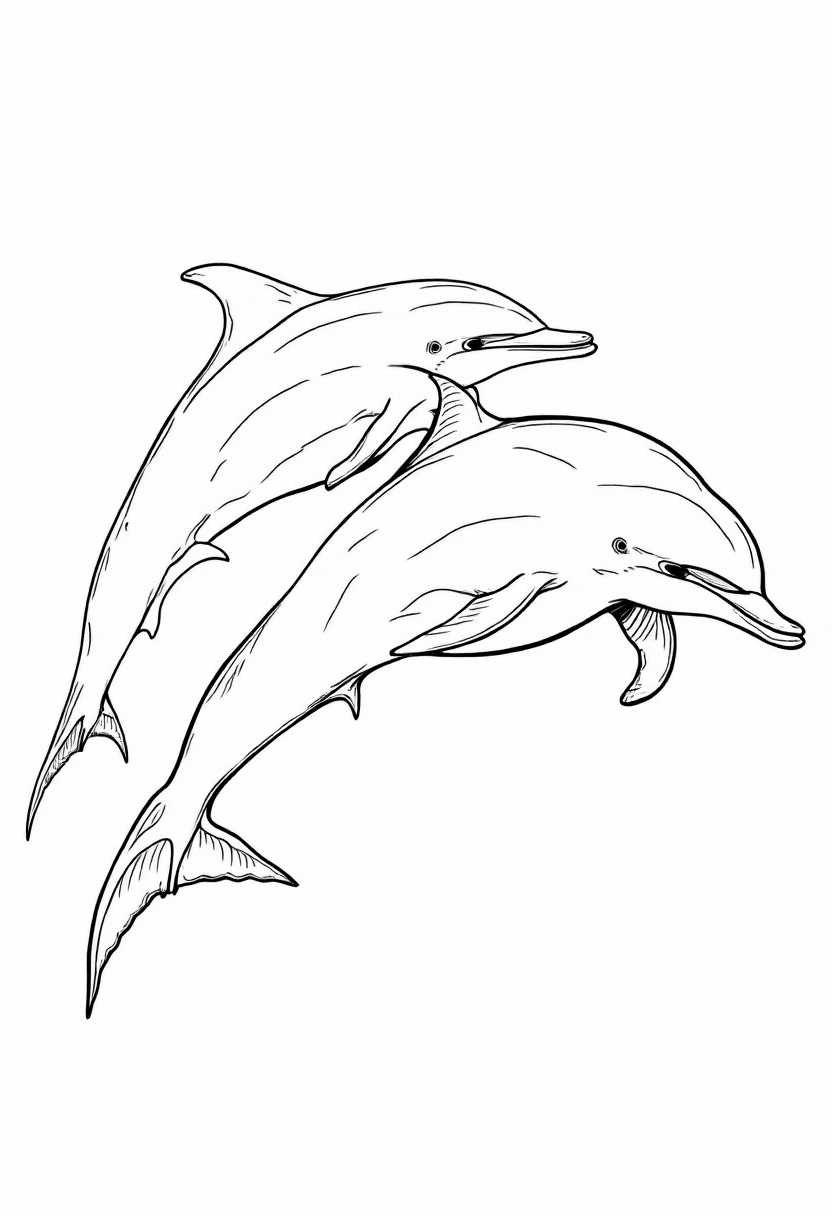

In [86]:
prompt = '''Black and white coloring book page, line art.  Dolphins swimming in ocean.  Ultra detailed, waves.'''
seed = random.randint(0, MAX_SEED)
print(seed)
image = gen_flux_image(prompt, 1216, 832, 3.5, 25, 512, seed)
image

  0%|          | 0/25 [00:00<?, ?it/s]

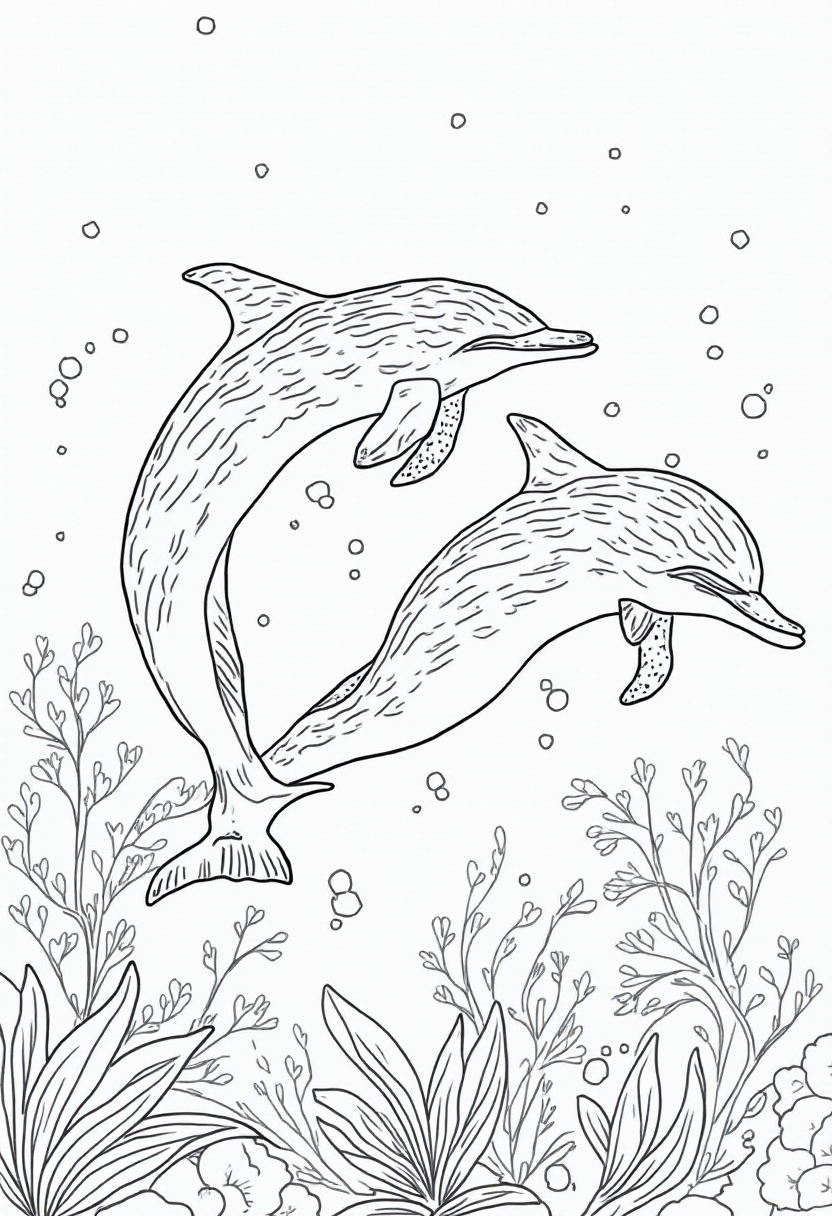

In [87]:
image = gen_flux_image(prompt, 1216, 832, 2.5, 25, 512, seed)
image

  0%|          | 0/25 [00:00<?, ?it/s]

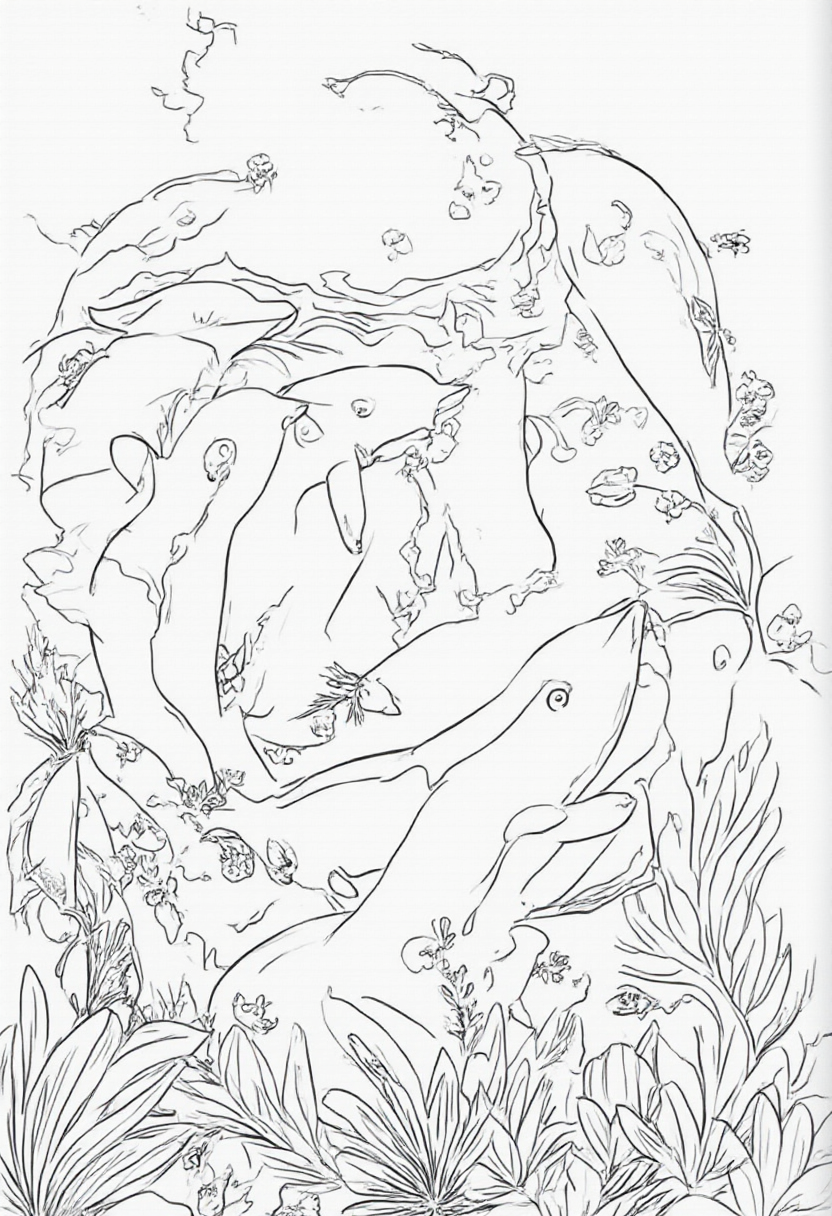

In [88]:
image = gen_flux_image(prompt, 1216, 832, 1.5, 25, 512, seed)
image

  0%|          | 0/25 [00:00<?, ?it/s]

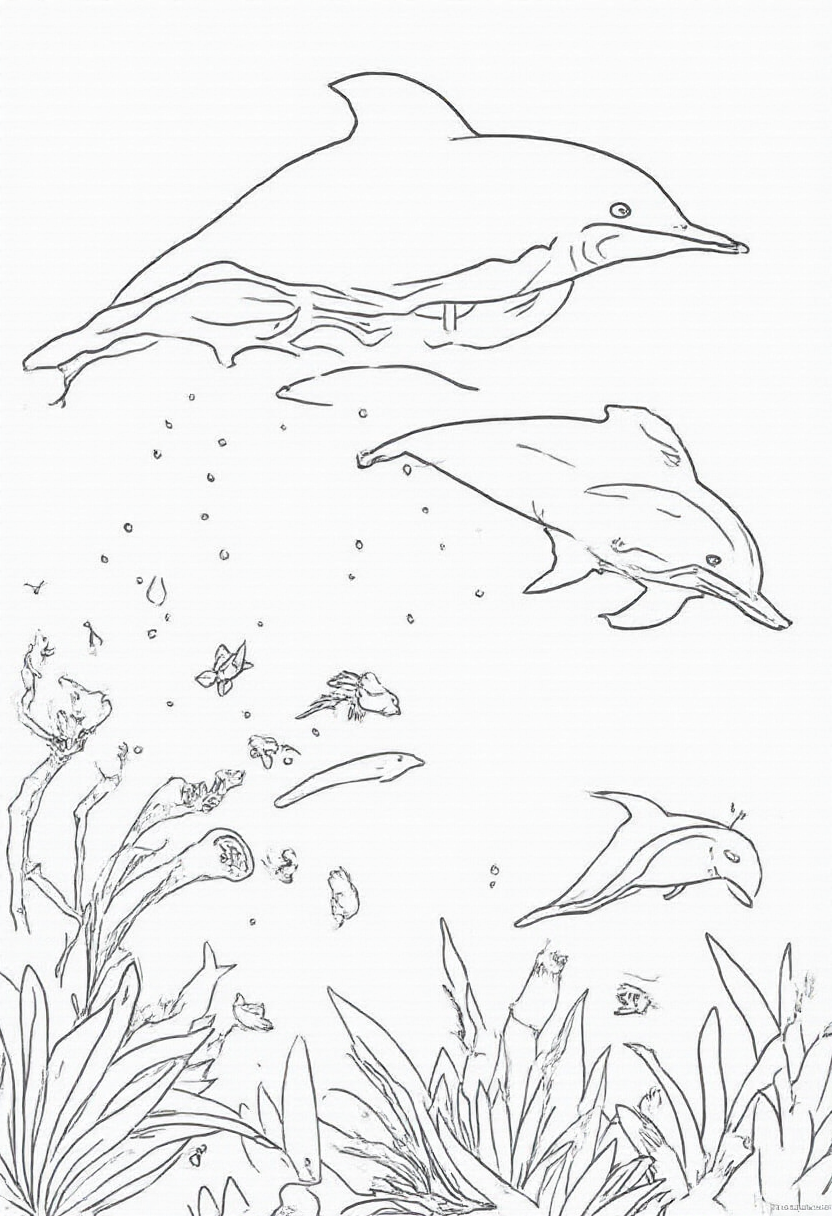

In [89]:
image = gen_flux_image(prompt, 1216, 832, 0.5, 25, 512, seed)
image

  0%|          | 0/25 [00:00<?, ?it/s]

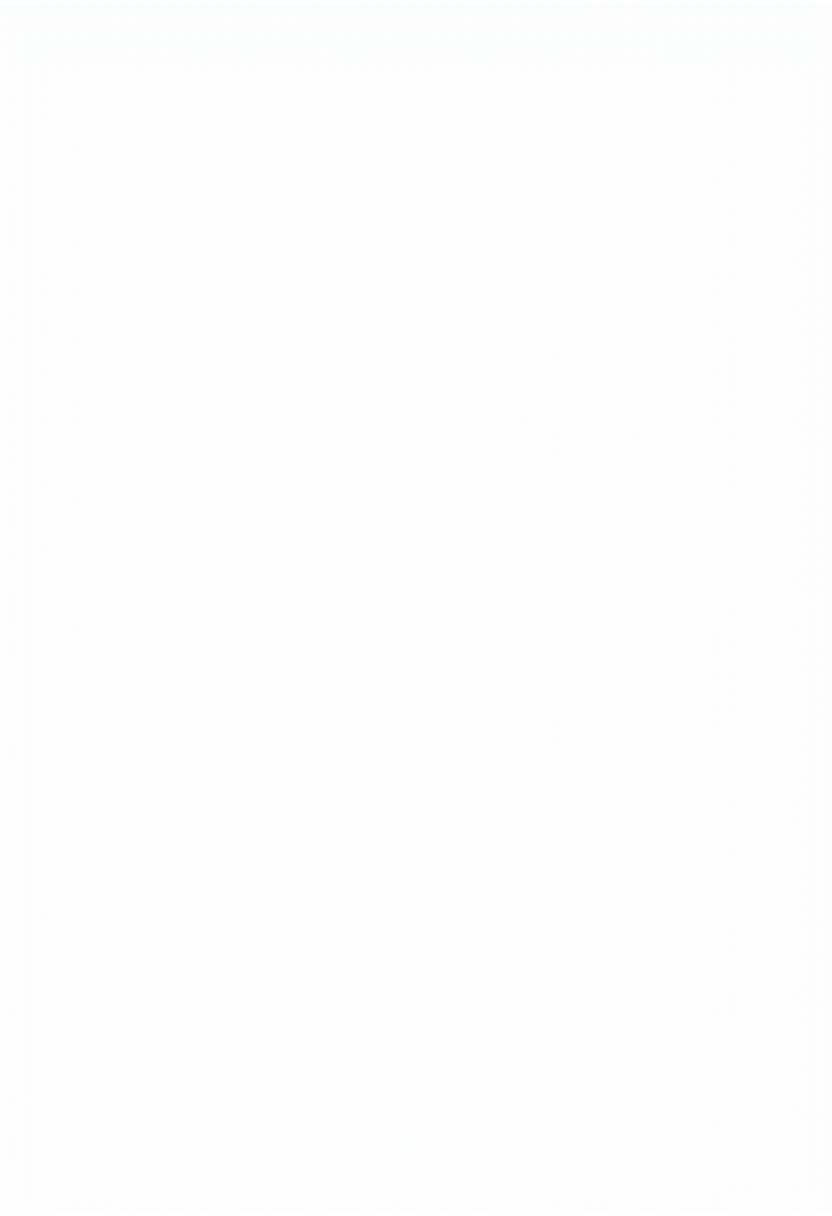

In [90]:
image = gen_flux_image(prompt, 1216, 832, 4.5, 25, 512, seed)
image

In [ ]:
image = gen_flux_image(prompt, 1216, 832, 5.5, 25, 512, seed)
image

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
image = gen_flux_image(prompt, 1216, 832, 6.5, 25, 512, seed)
image